Num of games: 10000 
Num of draw: 1242 
O wins 2832 
X wins 5926

o statistics:
[[1268  878 1271]
 [ 881 1718  900]
 [1363  889 1292]] 
[[ 0.12122371  0.08393881  0.12151052]
 [ 0.08422562  0.16424474  0.08604207]
 [ 0.13030593  0.08499044  0.12351816]]

x statistics:
[[2947 2417 2953]
 [2486 3530 2382]
 [2978 2451 2865]] 
[[ 0.11783758  0.09664521  0.11807749]
 [ 0.09940421  0.14114919  0.09524571]
 [ 0.11907713  0.09800472  0.11455876]]


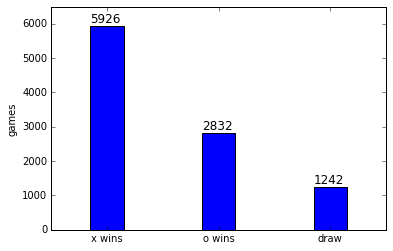

In [3]:
#%%file main.py
import numpy as np
import matplotlib.pyplot as plt

symbols = {1:'x', -1:'o', 0:' '}

'''
Description: 
    analyze the winner's move of a game

Parameters: 
    list_of_lines: the log of single game
    winner: who wins

Return: 
    array: all moves the winner takes in this game
    num_of_moves: number of moves the winner takes
'''
def analyze_moves_of_a_game(list_of_lines, winner): # winner: -1 if o wins, 1 if x wins
    array = np.zeros((3,3), dtype=int)
    num_of_moves = 0
    
    # only examine the final state of game 
    length_of_list = len(list_of_lines)
    for i in xrange(3,0,-1):
        elements = list_of_lines[length_of_list-i].split("'")
        for j in xrange(0,3):
            if (elements[(2*j)+1] == symbols[winner]):
                array[3-i][j] += 1
                num_of_moves += 1
    
    return array, num_of_moves

if __name__ == '__main__':
    
    with open('./log/game_log.txt', 'r') as f:
        # count the positions of moves player o and x take
        o_statistics = np.zeros((3,3), dtype=int)
        x_statistics = np.zeros((3,3), dtype=int)
        
        o_win = 0
        x_win = 0
        num_of_draw = 0
        num_of_games = 0
        
        lines_in_a_game = []
        sum_of_moves = [0, 0]
        
        '''
        Each time we load one line from log.txt file. 
        Those lines recording the same game will be stored in lines_in_a_game[].
        Whenever we detect the ending of game, we analyze lines_in_a_game[] and further empty it.
        '''
        for line in f:
            words = line.split(' ')
            if (words[0] == 'player'): # game over and there's a winner
                num_of_games += 1
                if (words[1] == 'o'):
                    o_win += 1
                    o_moves_array, num_of_o_moves = analyze_moves_of_a_game(lines_in_a_game, -1)
                    o_statistics += o_moves_array
                    sum_of_moves[0] += num_of_o_moves
                elif (words[1] == 'x'):
                    x_win += 1
                    x_moves_array, num_of_x_moves = analyze_moves_of_a_game(lines_in_a_game, 1)
                    x_statistics += x_moves_array
                    sum_of_moves[1] += num_of_x_moves                
                else:
                    print "Unknown format:", line
                    exit(1)
                    
                lines_in_a_game = []
                
            elif (words[0] == 'game'): # game over in a draw
                num_of_games += 1
                num_of_draw += 1
                lines_in_a_game = []
            else: # game still on
                lines_in_a_game.append(line)
                
    x_probability = np.divide(x_statistics, float(sum_of_moves[1]))
    o_probability = np.divide(o_statistics, float(sum_of_moves[0]))
    
    print "Num of games:", num_of_games, "\nNum of draw:", num_of_draw, "\nO wins", o_win, "\nX wins", x_win 
    print "\no statistics:\n", o_statistics, "\n", np.divide(o_statistics, float(sum_of_moves[0]))
    print "\nx statistics:\n", x_statistics, "\n", np.divide(x_statistics, float(sum_of_moves[1])) 
    
    # plot the result
    values = []
    values.extend((x_win, o_win, num_of_draw))
    ind = np.arange(3)
    fig, ax = plt.subplots()
    ax.bar(ind, values, 0.3, align='center')
    plt.xticks(ind, ('x wins', 'o wins', 'draw'))
    plt.ylabel('games')
    plt.ylim(0,6500)
    for i in range(3):
        plt.text(x = ind[i]-0.15, y = values[i]+100, s = str(values[i]), size=12)
    plt.show()
    
    np.savetxt("./prob/x_prob.txt", x_probability)
    np.savetxt("./prob/o_prob.txt", o_probability)          

In [159]:
%%file write_log_file.py
import sys
import subprocess

def parse_arguments():
    length_of_argv = len(sys.argv)
    if length_of_argv > 3:
        print "Usage: python write_log_file.py [-m] <NumberOfGamePlays=1000> "
        exit(1)
    elif length_of_argv == 3:
        return sys.argv[1], int(sys.argv[2])
    elif length_of_argv == 2:
        if sys.argv[1] == "-m":
            return "-m", 1000
        else:
            return "", int(sys.argv[1])
    else:
        return "", 1000

if __name__ == '__main__':
    version_of_game, number_of_games = parse_arguments()
    file_name = "./log/game_log.txt"
    py_script = "tic-tac-toe.py"
    if (version_of_game == "-m"):
        file_name = "./log/m_game_log.txt"
        py_script = "m_tic_tac_toe.py"
    
    with open(file_name, 'w') as f:
        for i in xrange(0, number_of_games):
            subprocess.call(["python", py_script], stdout=f)

Overwriting write_log_file.py


In [165]:
%%! 
python write_log_file.py -m 10000

[]

# Probabilistic Strategy for Tic Tac Toe

implement a probabilistic strategy for Tic Tac Toe

## Usage

### running tic-tac-toe.py and m_tic_tac_toe.py

tic-tac-toe.py is the original version, making a move uniformly at random. But in m_tic_tac_toe.py, we make a move according to the statistics we obtain from running tic-tac-toe.py

To run them, use 
```
    python tic-tac-toe.py
    python m_tic_tac_toe.py
```


### running write_log_file.py

write_log_file.py writes the log of entire tournament to an output file. You can also specify the number of game plays in this tournament and the tic-tac-toe version in the command line. 

To run it, use
```
    python write_log_file.py [-m] <NumberOfGamePlays=1000> 
    
    optional argument:
        -m : run the modified version of tic tac toe
```
And the output file will be put in ./log/ folder and named game_log.txt (or m_game_log.txt), depending on which version of tic tac toe you use. 

### running main.py

main.py loads the game_log.txt (or m_game_log.txt) and further creates a statistic of auspicious positions on the tic tac toe board. At last, the normalized statistic data is saved in the output file.

To run main.py, use
```
    python main.py 
```
Two output files, x_prob.txt and o_prob.txt, will be created inside ./prob/ folder. 

In [166]:
import numpy as np

symbols = {1:'x', -1:'o', 0:' '}

def analyze_moves_of_a_game(list_of_lines, winner): # winner: -1 if o wins, 1 if x wins
    array = np.zeros((3,3), dtype=int)
    num_of_moves = 0
    
    # only need to see the last array 
    length_of_list = len(list_of_lines)
    for i in xrange(3,0,-1):
        elements = list_of_lines[length_of_list-i].split("'")
        for j in xrange(0,3):
            if (elements[(2*j)+1] == symbols[winner]):
                array[3-i][j] += 1
                num_of_moves += 1
    
    return array, num_of_moves

if __name__ == '__main__':
    
    with open('./log/m_game_log.txt', 'r') as f:
        # count the moves player o and x take
        o_statistics = np.zeros((3,3), dtype=int)
        x_statistics = np.zeros((3,3), dtype=int)
        
        o_win = 0
        x_win = 0
        num_of_draw = 0
        num_of_games = 0
        
        lines_in_a_game = []
        sum_of_moves = [0, 0]
        for line in f:
            words = line.split(' ')
            if (words[0] == 'player'): # game over and there's a winner
                num_of_games += 1
                if (words[1] == 'o'):
                    o_win += 1
                    o_moves_array, num_of_o_moves = analyze_moves_of_a_game(lines_in_a_game, -1)
                    o_statistics += o_moves_array
                    sum_of_moves[0] += num_of_o_moves
                elif (words[1] == 'x'):
                    x_win += 1
                    x_moves_array, num_of_x_moves = analyze_moves_of_a_game(lines_in_a_game, 1)
                    x_statistics += x_moves_array
                    sum_of_moves[1] += num_of_x_moves                
                else:
                    print "Unknown format:", line
                    exit(1)
                    
                lines_in_a_game = []
                
            elif (words[0] == 'game'): # game over in a draw
                num_of_games += 1
                num_of_draw += 1
                lines_in_a_game = []
            else: # game still on
                lines_in_a_game.append(line)
                
    x_probability = np.divide(x_statistics, float(sum_of_moves[1]))
    o_probability = np.divide(o_statistics, float(sum_of_moves[0]))
    
    print "Num of games:", num_of_games, "\nNum of draw:", num_of_draw, "\nO wins", o_win, "\nX wins", x_win 
    print "\no statistics:\n", o_statistics, "\n", np.divide(o_statistics, float(sum_of_moves[0]))
    print "\nx statistics:\n", x_statistics, "\n", np.divide(x_statistics, float(sum_of_moves[1]))              

Num of games: 10000 
Num of draw: 1252 
O wins 2734 
X wins 6014

o statistics:
[[1249  928 1218]
 [ 887 1487  915]
 [1222  910 1254]] 
[[ 0.12403178  0.09215492  0.12095333]
 [ 0.08808342  0.14766634  0.09086395]
 [ 0.12135055  0.09036743  0.1245283 ]]

x statistics:
[[3102 2203 3073]
 [2286 3922 2221]
 [3064 2298 3039]] 
[[ 0.12305617  0.08739289  0.12190574]
 [ 0.0906855   0.15558553  0.08810695]
 [ 0.12154871  0.09116154  0.12055697]]


In [190]:
ind

array([0, 1, 2])